# Sales Prediction

### Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
135,136,48.3,47.0,8.5,11.6
127,128,80.2,0.0,9.2,8.8
191,192,75.5,10.8,6.0,9.9
66,67,31.5,24.6,2.2,9.5
119,120,19.4,16.0,22.3,6.6


### Data Collection & Analysis

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


The dataset contains information about advertising campaigns for a product in a market. Specifically, it includes data on the following variables:

   - TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
   - radio: advertising dollars spent on radio for a single product in a given market (in thousands of dollars)
   - newspaper: advertising dollars spent on newspaper for a single product in a given market (in thousands of dollars)
   - sales: number of units of the product sold in a given market (in thousands)

The data is provided for 200 different markets.

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Maximum amount spent is 296 & Minimum is 0.7

### EDA

In [8]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [10]:
# dropping the unnecessary column 'unnamed'
df = df.drop(columns=['Unnamed: 0'])

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [85]:
import plotly.express as px

fig = px.scatter(df, x="TV", y="Sales", color="Newspaper", hover_name="Radio", 
                 size="Sales", title="Sales vs Advertising Channels")
fig.show()


In [89]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=df.index, y=df['TV'], name='TV'))
fig.add_trace(go.Bar(x=df.index, y=df['Radio'], name='Radio'))
fig.add_trace(go.Bar(x=df.index, y=df['Newspaper'], name='Newspaper'))

fig.update_layout(barmode='stack', xaxis_title='Observations', yaxis_title='Sales')

fig.show()


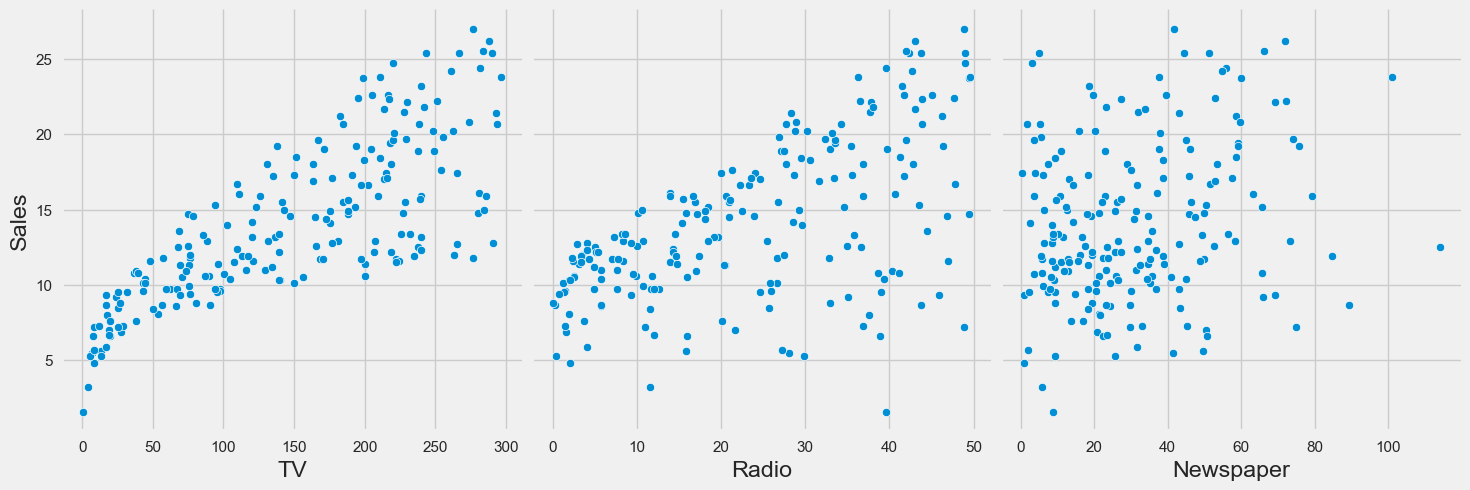

In [93]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=5)

In [12]:
# lets check for any data cleaning suggestions
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
TV,190,float64,0,0.000000,95.000000,0,
Newspaper,172,float64,0,0.000000,86.000000,0,
Radio,167,float64,0,0.000000,83.500000,0,
Sales,121,float64,0,0.000000,60.500000,0,


As we can see above, there are no null values present in the dataset.

In [13]:
# null values present in dataset
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
# duplicate values present in dataset
df.duplicated().sum()

0

There are no duplicate values present in the dataset as well.

In [15]:
# correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [20]:
# heatmap
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

In [37]:
fig = px.imshow(df.corr(), text_auto=True, color_continuous_scale='Viridis')
fig.show()

The variable "Sales" in the given dataset is highly correlated with the "TV" advertising expenditure, and has moderate and low correlation with "Radio" and "Newspaper" advertising expenditures respectively.

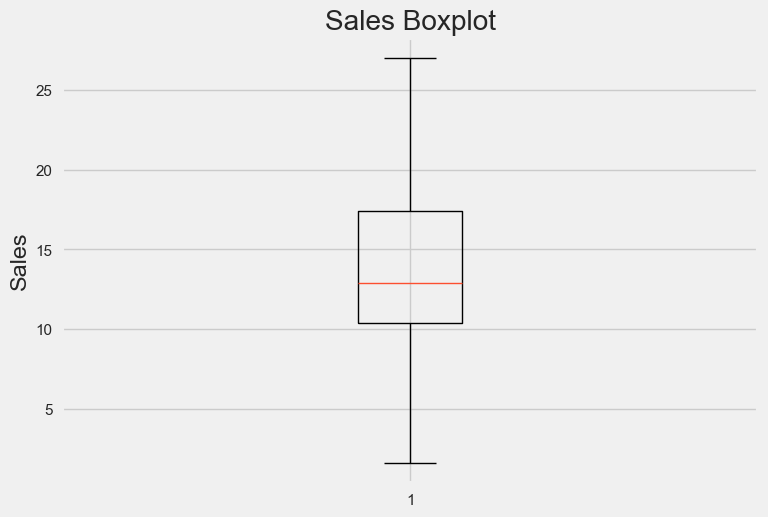

In [43]:
plt.boxplot(df["Sales"])
plt.title("Sales Boxplot")
plt.ylabel("Sales")
plt.show()

In [51]:
# Calculating Outliers in the dataset
def find_outliers(dataframe):
    outlier_percentages = []
    for column in dataframe.columns:
        if dataframe[column].dtype != object:
            q1, q3 = dataframe[column].quantile([0.25, 0.75])
            iqr = q3 - q1
            upper_bound = q3 + 1.5*iqr
            lower_bound = q1 - 1.5*iqr
            num_outliers = len(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])
            outlier_percentage = round(num_outliers/len(dataframe[column]) * 100, 2)
            outlier_percentages.append((column, outlier_percentage))
    outlier_df = pd.DataFrame(outlier_percentages, columns=['Column', 'Outlier Percentage'])
    outlier_df = outlier_df.sort_values(by='Outlier Percentage', ascending=False).reset_index(drop=True)
    return outlier_df


In [52]:
outlier_df = find_outliers(df)
outlier_df

,Column,Outlier Percentage
0,Newspaper,1.0
1,TV,0.0
2,Radio,0.0
3,Sales,0.0


As the length of the output is zero this means, there are no outliers in the dataset.

In [53]:
# function to remove outlier
def remove_outliers(dataframe):
    df = dataframe.copy()
    for column in df.columns:
        if df[column].dtype != object:
            q1, q3 = df[column].quantile([0.25, 0.75])
            iqr = q3 - q1
            upper_bound = q3 + 1.5*iqr
            lower_bound = q1 - 1.5*iqr
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [54]:
df_without_outliers = remove_outliers(df)

In [55]:
# lets check the outlier percentage
outlier_df = find_outliers(df_without_outliers)
outlier_df

,Column,Outlier Percentage
0,TV,0.0
1,Radio,0.0
2,Newspaper,0.0
3,Sales,0.0


So the new dataframe has no outliers which will benefit our model.

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

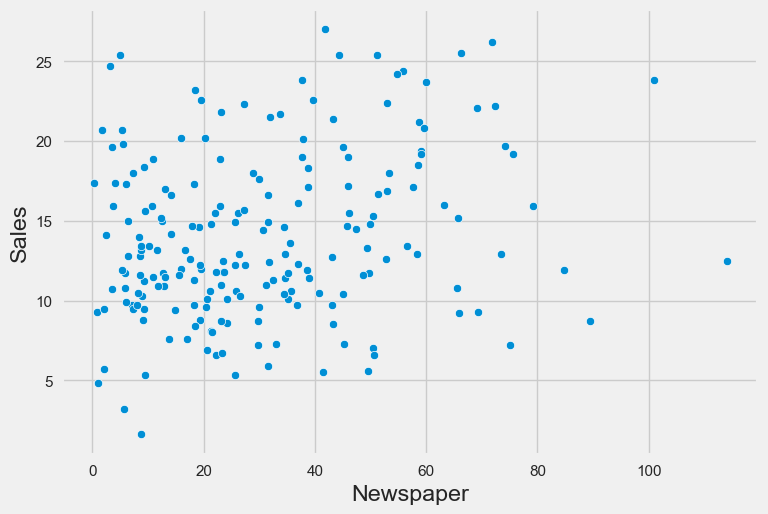

In [60]:
sns.scatterplot(x='Newspaper',y='Sales',data=df)

<AxesSubplot: xlabel='TV', ylabel='Sales'>

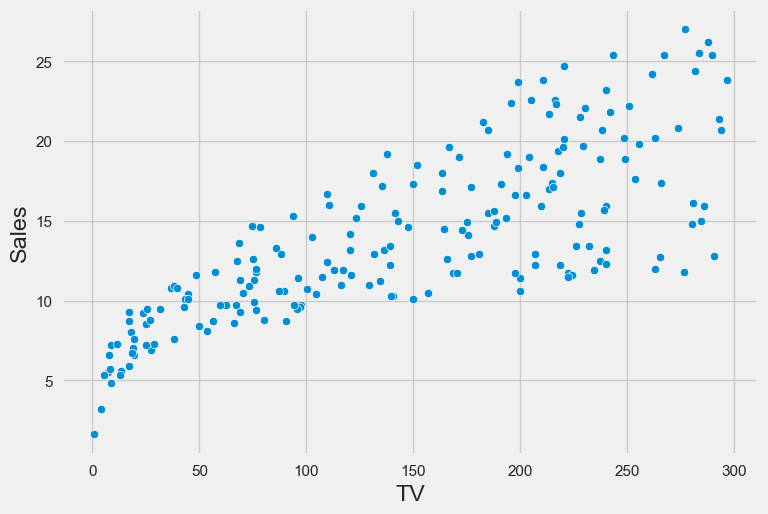

In [59]:
sns.scatterplot(x='TV',y='Sales',data=df)

<AxesSubplot: xlabel='Radio', ylabel='Sales'>

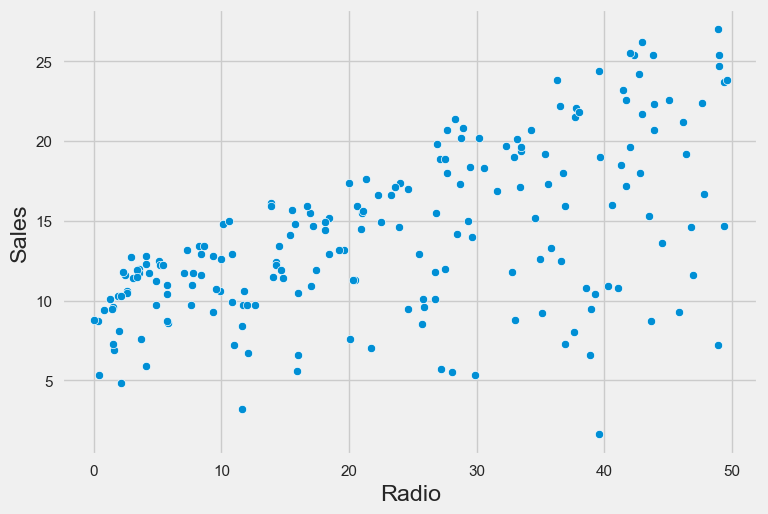

In [61]:
sns.scatterplot(x='Radio',y='Sales',data=df)

### Linear Regression Model

In [67]:
x=df.iloc[:,0:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [68]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Train Test Split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [73]:
sc=StandardScaler()

### Scaling

In [74]:
x_train_scaled=sc.fit_transform(x_train)

In [75]:
x_test_scaled=sc.fit_transform(x_test)

In [77]:
lr=LinearRegression()

### Model Training

In [79]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [80]:
y_pred=lr.predict(x_test_scaled)

In [83]:
r2_score(y_test,y_pred)

0.8863195562008254

### Conclusion

An 88.63% accuracy for a linear regression model is quite good. Based on this model, we can conclude that the TV advertisement spending has a significant impact on the Sales figures, with a positive correlation between the two variables. Radio advertisement spending also has a moderate positive correlation with Sales, while the correlation between Newspaper advertisement spending and Sales is weak.

Using this model, we can predict Sales figures based on the amount spent on TV, Radio, and Newspaper advertisement. However, it's important to note that this model is based on the assumption that the relationship between the variables is linear, which may not always be the case. 